Q: The Wage data set contains a number of other features not explored in this chapter, such as marital status (maritl), job class (jobclass), and others. Explore the relationships between some of these other predictors and wage, and use non-linear fitting techniques in order to fit flexible models to the data. Create plots of the results obtained, and write a summary of your findings.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Wage.csv")

In [2]:
pd.value_counts(df["year"])

2003    513
2004    485
2005    447
2006    392
2009    389
2008    388
2007    386
Name: year, dtype: int64

C:\Users\daner\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


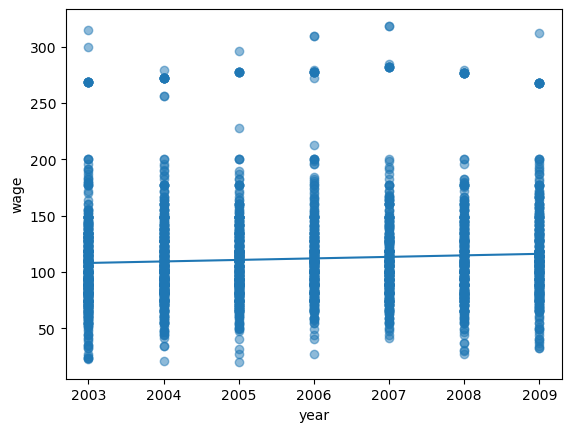

In [3]:
X = np.arange(2003, 2009.1, 0.1).reshape(-1, 1)

year_step = LinearRegression()
year_step.fit(df[["year"]], df["wage"])

y_pred = year_step.predict(X)

fitted = pd.DataFrame({"year": X.flatten(), "wage": y_pred})

plt.scatter(df["year"], df["wage"], alpha=0.5)
plt.plot(fitted["year"], fitted["wage"])
plt.xlabel("year")
plt.ylabel("wage")
plt.show()

In [4]:
pd.value_counts(df["maritl"])

2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

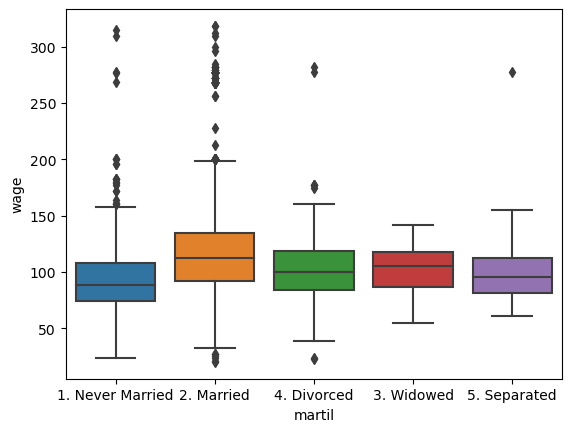

In [5]:
sns.boxplot(data=df, x="maritl", y="wage")
plt.xlabel("martil")
plt.ylabel("wage")
plt.show()

Due to the low volumes, it would make sense to combined the 3. Widowed category with another category (e.g. 4. Divorced) to create something like 6. Previously Married before modelling.

In [6]:
pd.value_counts(df["race"])

1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

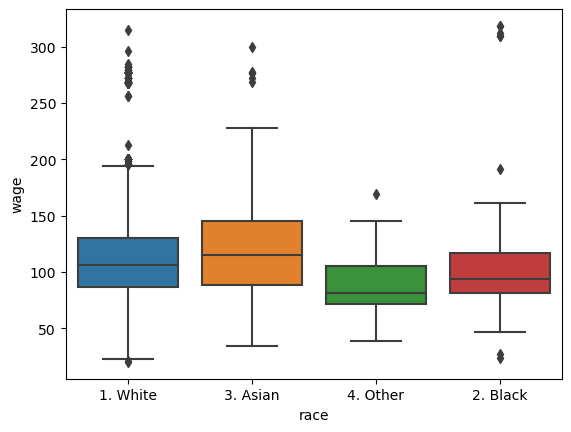

In [7]:
sns.boxplot(data=df, x="race", y="wage")
plt.xlabel("race")
plt.ylabel("wage")
plt.show()

In this dataset asian men earn the most, followed by white men and black men. You could potentially combine 4. Other with 2. Black (the closest category w.r.t. the response) or 3. Asian (the second-smallest category) before modelling.

In [8]:
pd.value_counts(df["education"])

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

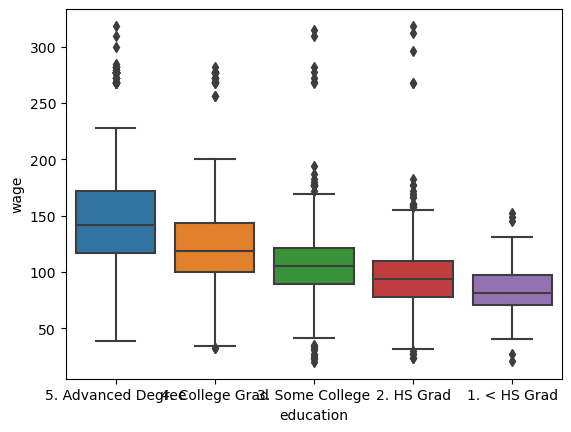

In [9]:
education_means = df.groupby('education')['wage'].mean().sort_values(ascending=False).index
df['education'] = pd.Categorical(df['education'], categories=education_means, ordered=True)

sns.boxplot(data=df, x="education", y="wage")
plt.xlabel("education")
plt.ylabel("wage")
plt.show()

This is an ordinal categorical variable, and we can see a clear positive relationship between education-level and wage.

In [10]:
pd.value_counts(df["region"])

2. Middle Atlantic    3000
Name: region, dtype: int64

The variable has no variance and so obviously won’t be used in modelling.

In [11]:
pd.value_counts(df["jobclass"])

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

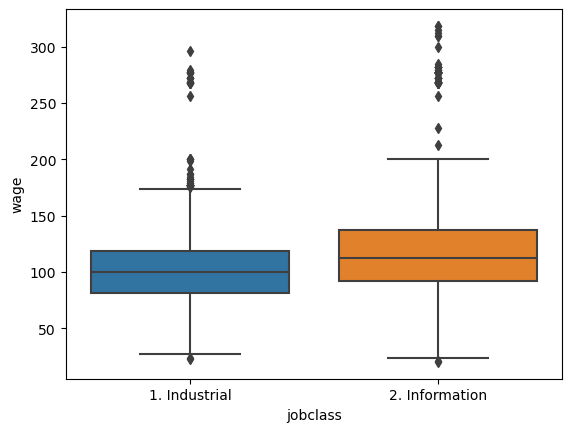

In [12]:
sns.boxplot(data=df, x="jobclass", y="wage")
plt.xlabel("jobclass")
plt.ylabel("wage")
plt.show()

In [13]:
pd.value_counts(df["health"])

2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64

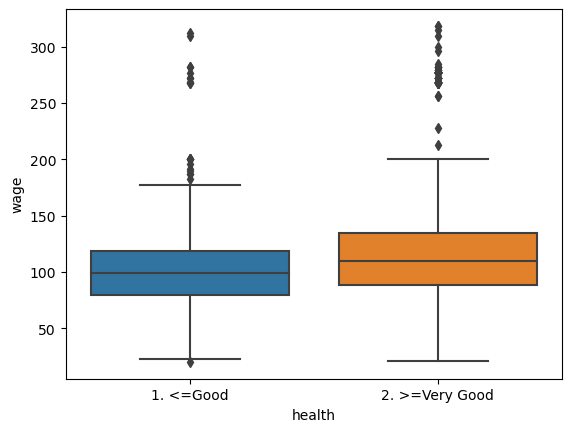

In [14]:
sns.boxplot(data=df, x="health", y="wage")
plt.xlabel("health")
plt.ylabel("wage")
plt.show()

In [15]:
pd.value_counts(df["health_ins"])

1. Yes    2083
2. No      917
Name: health_ins, dtype: int64

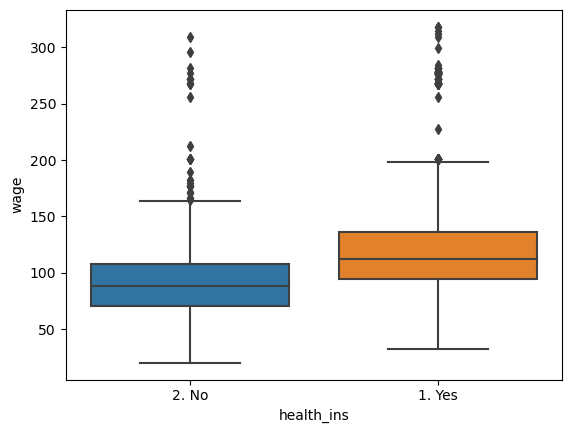

In [16]:
sns.boxplot(data=df, x="health_ins", y="wage")
plt.xlabel("health_ins")
plt.ylabel("wage")
plt.show()

In [17]:
df_cleaned = df[["wage", "age", "year", "maritl", "race", "education", "region", "jobclass", "health", "health_ins"]].copy()

df_cleaned["maritl"] = df_cleaned["maritl"].apply(lambda x: "6. Previously Married" if x in ["3. Widowed", "4. Divorced"] else x)

df_cleaned["race"] = df_cleaned["race"].apply(lambda x: "5. Black & Other" if x in ["2. Black", "4. Other"] else x)

X = df_cleaned[["age", "year", "maritl", "race", "education", "jobclass", "health", "health_ins"]]
X = pd.get_dummies(X, drop_first=True)
X["age_poly_1"] = X["age"] ** 1
X["age_poly_2"] = X["age"] ** 2
X["age_poly_3"] = X["age"] ** 3
X = X.drop("age", axis=1)
X["year_cut"] = pd.cut(df_cleaned["year"], bins=range(2002, 2010))
X = pd.get_dummies(X, columns=["year_cut"], drop_first=True)

X = sm.add_constant(X)
y = df_cleaned["wage"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     76.44
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          8.99e-260
Time:                        20:24:34   Log-Likelihood:                -14803.
No. Observations:                3000   AIC:                         2.965e+04
Df Residuals:                    2978   BIC:                         2.978e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           